## 1. We start by acquiring the dataset from Google Drive, and saving it in Google Drive again after Processing

In [16]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
!pip install PySoundFile
import numpy as np
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read All of Data 1 from Drive

In [ ]:
DATADIR = "/content/gdrive/MyDrive/ASR_files/" # The Mother Folder for the Dataset
CATEGORIES = ["84", "174", "251"] # The folders we are looking forward to access within the mother folder
list_of_data = [] # List of Datapoints involving audio samples, and samplerates
big_data_list = [] # List of text file data
for category in CATEGORIES: # Each folder in this list of folders
    path = os.path.join(DATADIR, category) # Join the path by sewing together the addresses of folder and mother folder
    for dir in os.listdir(path): # Each folder within that one folder
      path_1 = os.path.join(path, dir) # Join this folder's path
      for sig in os.listdir(path_1): # For each signal in the folder
        new_path = os.path.join(path_1, sig) # Create a path for it
        if "txt" in sig:
          my_file = open(new_path, "r") # Open Text file, its path name is "new_path"
          data = my_file.read() # read file
          data_list = data.split("\n") # Split on new lines
        if "flac" in sig:
          data, samplerate = sf.read(new_path) # Read using the created path
          list_of_data.append([sig, data, samplerate])
      big_data_list.append(data_list)

# Save all the PNG files in a Folder

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


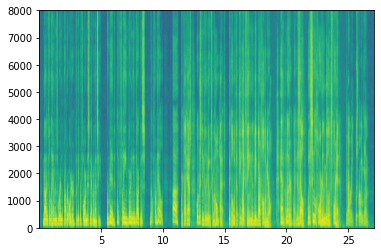

In [ ]:
for i, dat in enumerate(list_of_data):
  Pxx, freqs, bins, im = plt.specgram(dat[1], Fs=dat[2])
  plt.savefig(f"/content/gdrive/MyDrive/ASR_files/New_Data/{dat[0].replace('.flac', '')}.png")

# Now, we read the Data Back up, and set up a data code for the string data

84-121550-0022.png
AS SOON AS ON MY VISION SMOTE THE POWER SUBLIME THAT HAD ALREADY PIERCED ME THROUGH ERE FROM MY BOYHOOD I HAD YET COME FORTH


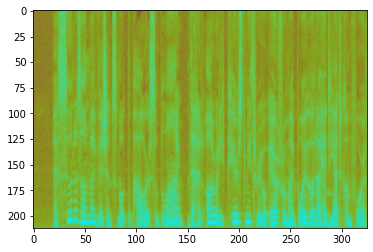

In [22]:
final_path = os.listdir("/content/gdrive/MyDrive/ASR_files/New_Data")
list_of_f_data = [] # Images saved to be loaded in this
for p in final_path:
  print(p)
  for big_data in big_data_list:
    for txt in big_data:
      if p.replace(".png", "") in txt:
        print(txt.replace(p.replace(".png", "") + " ", ''))
  new_p = os.path.join("/content/gdrive/MyDrive/ASR_files/New_Data", p)
  img = cv2.imread(new_p)
  img = img[38:250, 55:380]
  plt.imshow(img)
  break
  #list_of_f_data.append([img])ASR_files/

In [25]:
for txt in big_data_list[0]:
  test = list_of_data[0][0].replace('.flac', '')
  if test in txt:
    print(txt.replace(test, ''))
    print(big_data_list[0][0])
    break

 AS SOON AS ON MY VISION SMOTE THE POWER SUBLIME THAT HAD ALREADY PIERCED ME THROUGH ERE FROM MY BOYHOOD I HAD YET COME FORTH
84-121550-0000 BUT WITH FULL RAVISHMENT THE HOURS OF PRIME SINGING RECEIVED THEY IN THE MIDST OF LEAVES THAT EVER BORE A BURDEN TO THEIR RHYMES


## 2. Load Second Dataset for Words Spoken

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


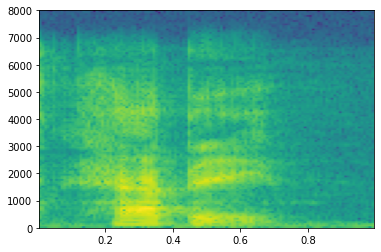

In [24]:
DATADIR = "/content/gdrive/MyDrive/ASR_files/Audio_Data" # The Mother Folder for the Dataset
CATEGORIES = ['bed', 'cat', 'happy'] # The folders we are looking forward to access within the mother folder
for cat in CATEGORIES: # Each folder in this list of folders
  p = os.path.join(DATADIR, cat) # Join the path by sewing together the addresses of folder and mother folder
  for i, sig in enumerate(os.listdir(p)): # Each folder within that one folder
    n_p = os.path.join(p, sig) # Join this folder's path
    data, samplerate = sf.read(n_p) # Read using the created path
    Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)
    plt.savefig(f"/content/gdrive/MyDrive/ASR_files/N_Data/{cat + str(i)}.png")

## 3. Reload the Spectrograms, and make a dataset of Images

In [26]:
DATADIR = "/content/gdrive/MyDrive/ASR_files/N_Data"
final_path = os.listdir("/content/gdrive/MyDrive/ASR_files/N_Data")
CATEGORIES = ['bed', 'cat', 'happy']
list_of_f_data = [] # Images saved to be loaded in this
for p in final_path:
  for cat in CATEGORIES:
    if cat in p:
      c = CATEGORIES.index(cat)
  img = cv2.imread(os.path.join(DATADIR, p))
  img = img[38:250, 55:380]
  list_of_f_data.append([img, c])

90
2


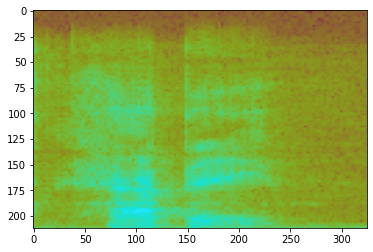

In [27]:
print(len(list_of_f_data))
plt.imshow(list_of_f_data[-1][0])
print(list_of_f_data[-1][1])

## 4. Build the CNN Model for Second Dataset

# Model with one Conv Layer

In [28]:
var = list_of_f_data
random.shuffle(var)
X = []
y = []

for image, label in var:
    X.append(image)
    y.append(label)
    
X = np.array(X).reshape(-1, list_of_f_data[0][0].shape[0], list_of_f_data[0][0].shape[1], 3)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(len(CATEGORIES), activation='softmax'))
X = np.array(X)
y = np.array(y)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(X, y, epochs=32)

Epoch 1/32
3/3 [==============================] - 5s 1s/step - loss: 7267.3140 - accuracy: 0.4000
Epoch 2/32
3/3 [==============================] - 3s 1s/step - loss: 7602.3770 - accuracy: 0.3556
Epoch 3/32
3/3 [==============================] - 5s 2s/step - loss: 4710.2231 - accuracy: 0.3333
Epoch 4/32
3/3 [==============================] - 4s 1s/step - loss: 3906.9709 - accuracy: 0.4444
Epoch 5/32
3/3 [==============================] - 5s 2s/step - loss: 1108.9159 - accuracy: 0.5222
Epoch 6/32
3/3 [==============================] - 3s 1s/step - loss: 1512.6769 - accuracy: 0.3444
Epoch 7/32
3/3 [==============================] - 3s 1s/step - loss: 896.7677 - accuracy: 0.3889
Epoch 8/32
3/3 [==============================] - 3s 1s/step - loss: 497.9158 - accuracy: 0.6333
Epoch 9/32
3/3 [==============================] - 3s 1s/step - loss: 608.1176 - accuracy: 0.6000
Epoch 10/32
3/3 [==============================] - 3s 1s/step - loss: 255.1627 - accuracy: 0.6778
Epoch 11/32
3/3 [======

In [29]:
model.save("/content/gdrive/MyDrive/ASR_files/ASR_Model/1_conv.h5", hist)

# Model with 2 Conv Layers

In [30]:
var = list_of_f_data
random.shuffle(var)
X = []
y = []

for image, label in var:
    X.append(image)
    y.append(label)
X = np.array(X).reshape(-1, list_of_f_data[0][0].shape[0], list_of_f_data[0][0].shape[1], 3)



In [31]:
X[1]

array([[[137,  75,  61],
        [138,  77,  60],
        [139,  82,  58],
        ...,
        [140,  92,  53],
        [141,  98,  50],
        [141, 102,  49]],

       [[141,  98,  50],
        [141,  96,  51],
        [141,  94,  52],
        ...,
        [141, 101,  49],
        [141, 101,  49],
        [141, 101,  49]],

       [[141, 100,  49],
        [141,  97,  51],
        [141,  94,  52],
        ...,
        [141, 106,  47],
        [141, 103,  48],
        [141, 101,  49]],

       ...,

       [[141, 134,  36],
        [141, 135,  35],
        [141, 136,  35],
        ...,
        [138, 151,  30],
        [138, 152,  30],
        [138, 152,  30]],

       [[142, 128,  38],
        [141, 133,  36],
        [141, 139,  34],
        ...,
        [136, 158,  30],
        [136, 159,  30],
        [135, 160,  30]],

       [[142, 120,  41],
        [142, 130,  37],
        [140, 144,  32],
        ...,
        [132, 167,  34],
        [130, 170,  36],
        [129, 172,  38]]

In [32]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(len(CATEGORIES), activation='softmax'))
X = np.array(X)
y = np.array(y)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(X, y, epochs=35)

Epoch 1/35
3/3 [==============================] - 103s 33s/step - loss: 1061.6100 - accuracy: 0.3333
Epoch 2/35
3/3 [==============================] - 97s 31s/step - loss: 385.2056 - accuracy: 0.3444
Epoch 3/35
3/3 [==============================] - 96s 31s/step - loss: 30.2014 - accuracy: 0.3556
Epoch 4/35
3/3 [==============================] - 97s 31s/step - loss: 1.0504 - accuracy: 0.5111
Epoch 5/35
3/3 [==============================] - 102s 31s/step - loss: 1.1113 - accuracy: 0.3667
Epoch 6/35
3/3 [==============================] - 97s 31s/step - loss: 1.1120 - accuracy: 0.3556
Epoch 7/35
3/3 [==============================] - 96s 31s/step - loss: 1.0986 - accuracy: 0.4111
Epoch 8/35
3/3 [==============================] - 98s 32s/step - loss: 1.0985 - accuracy: 0.3556
Epoch 9/35
3/3 [==============================] - 96s 31s/step - loss: 1.0981 - accuracy: 0.3556
Epoch 10/35
3/3 [==============================] - 96s 31s/step - loss: 1.0984 - accuracy: 0.3556
Epoch 11/35
3/3 [====

In [37]:
model.save("/content/gdrive/MyDrive/ASR_files/ASR_Model/2_conv.h5", hist)

## Test Rig for the Models

# Set up of Test Data Instance for 1 Conv Layer Model

Prediction:  cat


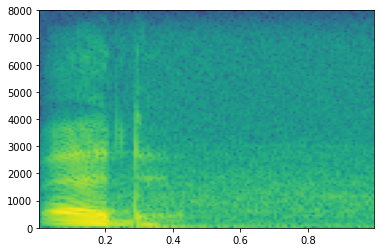

In [46]:
n_p = "/content/gdrive/MyDrive/ASR_files/test_data/bed/videos_cnn-audio_data_bed_7910d292_nohash_0.wav" #Enter Test File Path
data, samplerate = sf.read(n_p)
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)
plt.savefig("/content/gdrive/MyDrive/ASR_files/test_data/test.png") # Name Your Test File Spectrogram
img = cv2.imread("/content/gdrive/MyDrive/ASR_files/test_data/test.png")
test_img = img[38:250, 55:380]
model = load_model("/content/gdrive/MyDrive/ASR_files/ASR_Model/1_conv.h5")
test_img = np.array(test_img).reshape(-1, test_img.shape[0], test_img.shape[1], 3)
CATEGORIES = ['bed', 'cat', 'happy']
print("Prediction: ", CATEGORIES[np.argmax(model.predict(test_img))])

# 2 Conv Layer Model

Prediction:  happy


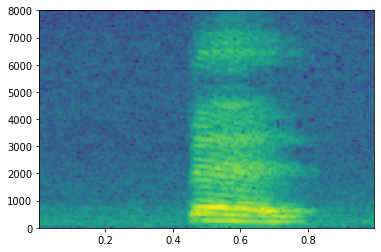

In [47]:
n_p = "/content/gdrive/MyDrive/ASR_files/test_data/bed/videos_cnn-audio_data_bed_7846fd85_nohash_0.wav" #Enter Test File Path
data, samplerate = sf.read(n_p)
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)
plt.savefig("/content/gdrive/MyDrive/ASR_files/test_data/test.png") # Name Your Test File Spectrogram
img = cv2.imread("/content/gdrive/MyDrive/ASR_files/test_data/test.png")
test_img = img[38:250, 55:380]
model = load_model("/content/gdrive/MyDrive/ASR_files/ASR_Model/2_conv.h5")
test_img = np.array(test_img).reshape(-1, test_img.shape[0], test_img.shape[1], 3)
CATEGORIES = ['bed', 'cat', 'happy']
print("Prediction: ", CATEGORIES[np.argmax(model.predict(test_img))])